<h1> APRENDIZAJE NO SUPERVISADO</h1>
<h2> ING DE SISTEMAS</h2>
<h3> Diego Roberto Arancibia Delgado</h3>



In [30]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [31]:
# Mount Google Drive
# drive.mount('/content/drive')

In [32]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [33]:
data = pd.read_csv('kc_house_data.csv', delimiter=",")

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [34]:

# Paso 1: Eliminar columnas innecesarias
data = data.drop(['id', 'date',], axis=1)
# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Eliminar las columnas 'CustomerId' y 'Surname'



In [35]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [36]:
scaled_data

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.00568792, -0.39873715,  0.1756067 , ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.38158814, -0.39873715,  0.50022075, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [37]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

array([2, 2, 2, ..., 2, 1, 2])

In [38]:
kmeans.cluster_centers_

array([[ 1.52429167,  0.8086056 ,  1.21318906,  1.65754672,  0.51726369,
         0.58315769,  0.39458702,  0.94079319, -0.10539514,  1.51879415,
         1.49747797,  0.6378821 ,  0.39341017,  0.23681627, -0.23850733,
         0.24941493,  0.35030495,  1.49227177,  0.53830545],
       [-0.17196121,  0.11358175,  0.41417013,  0.0705238 , -0.05112328,
         0.60020259, -0.08717263, -0.22766741, -0.35715818,  0.20855884,
         0.23056175, -0.28504582,  0.74785816, -0.14701807, -0.38689197,
        -0.1999911 ,  0.41179808,  0.11318976, -0.04356288],
       [-0.34283168, -0.33879013, -0.69507541, -0.57011814, -0.1218796 ,
        -0.6414556 , -0.05606213, -0.11847469,  0.30647724, -0.63268257,
        -0.64290483,  0.01980199, -0.69551408,  0.03891504,  0.37070471,
         0.07558148, -0.42459678, -0.55135094, -0.13422394]])

In [39]:
import numpy as np

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-0.61312088 -0.39873715  0.50022075  0.28320416 -0.19966337  0.93650577
  -0.08717263 -0.30575946 -0.62918687 -0.55883575  0.66613704 -0.65868104
   0.71477399 -0.21012839 -0.89600767 -1.43801814  0.14128452 -0.1992375
  -0.24024188]
 [-0.4592197  -0.39873715 -1.44746357 -0.46808639 -0.21021394 -0.915427
  -0.08717263 -0.30575946  0.90755354 -0.55883575 -0.97623258  0.85522154
  -0.57894295 -0.21012839  0.52445249 -0.28906159 -1.07298778 -1.10385117
  -0.23324645]
 [ 0.87686041  0.67648506  0.1756067   0.15254493 -0.26332895  0.01053939
  -0.08717263 -0.30575946  2.44429394  0.29191561 -0.57771642  1.39751501
  -1.32793697 -0.21012839  2.26264717  0.58997678 -1.278917    0.04880173
  -0.28671935]
 [-0.88551234  0.67648506  0.1756067  -0.19587967 -0.13295575 -0.915427
  -0.08717263 -0.30575946  0.90755354 -0.55883575  0.13478216 -0.65868104
  -0.13635558 -0.21012839 -0.8773174  -1.00499431  0.09867848  0.07798282
  -0.11604557]]
Predicciones de cluster para las

<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

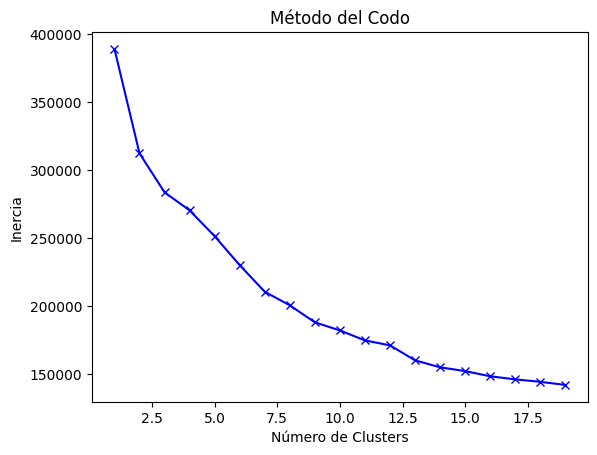

El número óptimo de clusters según el método del codo es: 19


In [40]:
import numpy as np
none_y = scaled_data[:, :-1]

inertias = []
k_range = range(1, 20)  # Prueba con un rango de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster
print("El número óptimo de clusters según el método del codo es:", best_num_clusters_codo)



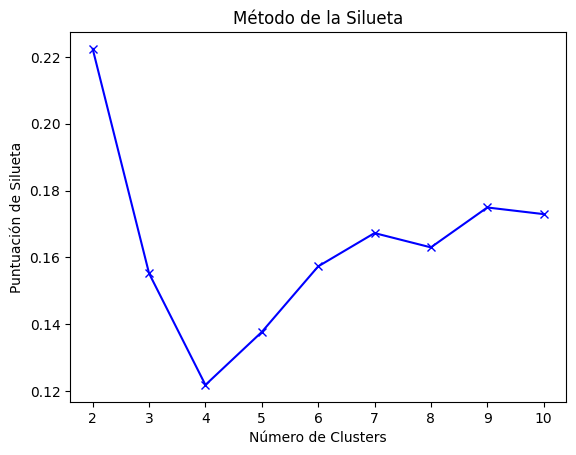

El número óptimo de clusters según la puntuación de silueta es: 2


In [41]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


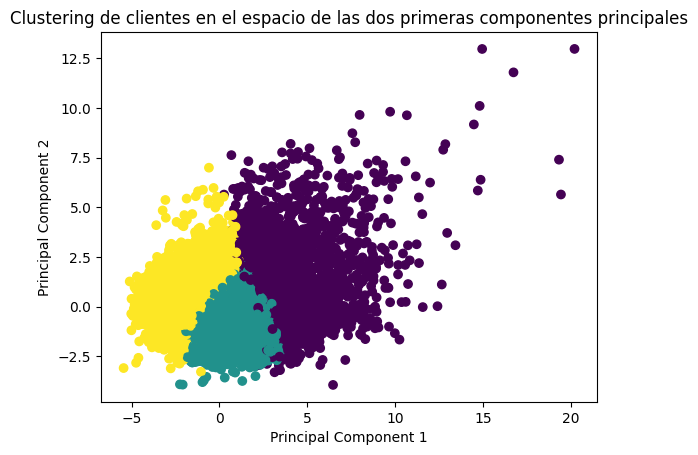

In [42]:
# Reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(none_y)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()


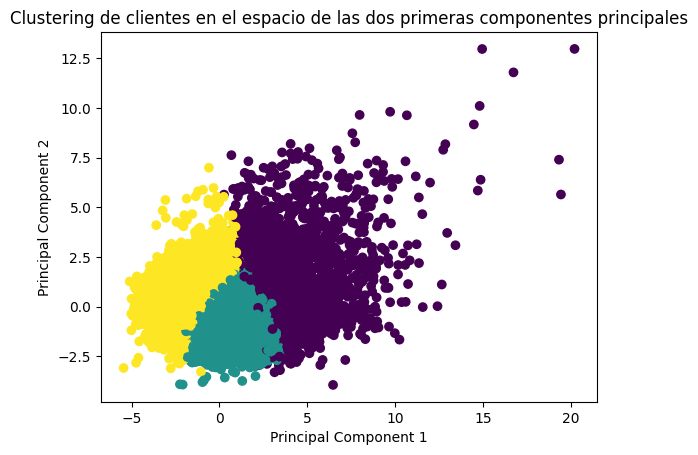

In [43]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(none_y)

# Trama de dispersión de los clusters en las dos primeras componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()

In [44]:
none_y

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.35257175,
        -0.30607896, -0.9433552 ],
       [-0.00568792, -0.39873715,  0.1756067 , ...,  1.16156823,
        -0.74634143, -0.43268619],
       [-0.98084935, -1.47395936, -1.44746357, ...,  1.28353661,
        -0.13565477,  1.07013975],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ...,  0.24788796,
        -0.60432128, -1.41025258],
       [-0.38158814, -0.39873715,  0.50022075, ..., -0.18441416,
         1.02891048, -0.8412214 ],
       [-0.58588173, -1.47395936, -1.77207762, ...,  0.24572284,
        -0.60432128, -1.41025258]])

In [45]:
# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data
y_train = train_data['price']
X_test = test_data
y_test = test_data['price']

print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(X_train)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(X_test)}")

--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 17290
El 20% de ejemplos que serán para el prueba son: 4323


In [46]:
# Normalizar los datos
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [47]:
X_train_

array([[-0.58864574, -0.39526335, -0.47445144, ...,  0.44228847,
         1.12607326,  0.01344043],
       [-0.77677507, -1.46896378, -1.45258323, ..., -0.53995821,
        -1.04652268, -0.28066159],
       [-0.85562339, -0.39526335, -1.45258323, ..., -0.86025604,
        -1.19331971, -0.1789339 ],
       ...,
       [ 0.10300621, -0.39526335,  0.50368036, ...,  1.29641601,
        -0.42997519, -0.36604019],
       [-0.80997436, -2.54266422, -1.77862716, ..., -0.77484328,
        -1.19331971,  0.08265159],
       [-0.61631182,  0.67843709,  0.50368036, ...,  0.81952813,
         1.52242522, -0.24443927]])

In [48]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_)
train_data['kmeans3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# Transformamos los datos de entrenamiento en distancias euclidianas a los centroides
X_digits_dist = kmeans.transform(X_train_)


In [49]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(17290, 2)
[[3.31643985 3.71580219]
 [2.6501524  6.32319372]
 [2.48587352 5.92886206]
 ...
 [3.33197255 3.10709839]
 [4.21915278 7.66480344]
 [4.74554714 2.88121408]]


In [50]:
# Logistic Regression
# Logistic Regression
logistic_regression = LogisticRegression()

# Ajustar el modelo de regresión logística
logistic_regression.fit(X_train, y_train)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Ahora puedes predecir con el conjunto de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Porcentaje de precisión:", accuracy)

Porcentaje de precisión: 0.026601896830904463


C:\Users\Asus-Rog\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


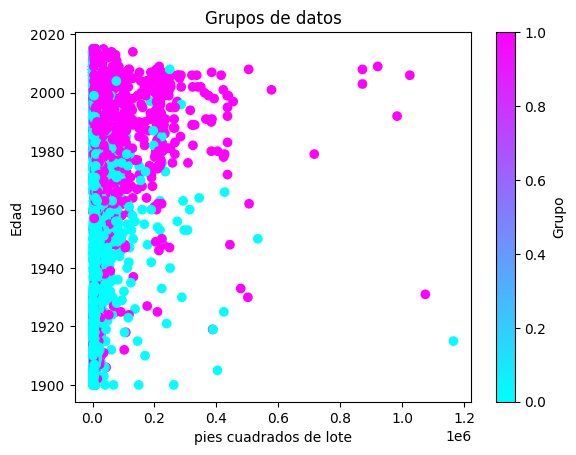

In [51]:
# Asumiendo que 'kmeans' es tu modelo KMeans ya ajustado
train_data['kmeans_3'] = kmeans.labels_

# Ahora puedes graficar los grupos
plt.scatter(train_data['sqft_lot'], train_data['yr_built'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('pies cuadrados de lote')
plt.ylabel('Edad')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

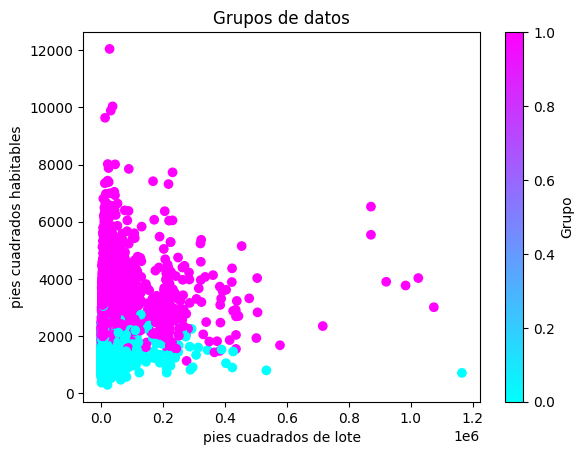

In [52]:
plt.scatter(train_data['sqft_lot'], train_data['sqft_living'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('pies cuadrados de lote')
plt.ylabel('pies cuadrados habitables')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

In [53]:
# Supongamos que tienes algunos datos para predecir
# Por ejemplo, tomaremos la primera fila del conjunto de prueba
# Asegúrate de ajustar los datos según corresponda a tu conjunto de datos
datos_nuevos = X_test.iloc[1000]

# Convertir datos_nuevos a un DataFrame con los nombres de las columnas preservados
datos_nuevos_df = pd.DataFrame([datos_nuevos], columns=X_test.columns)

# Realizar la predicción utilizando el modelo entrenado
prediccion = logistic_regression.predict(datos_nuevos_df)

# Imprimir la predicción
print("Predicción:", prediccion)



Predicción: [550000.]
